<a href="https://colab.research.google.com/github/ljy9969/Study/blob/master/colab(0418)_cat_dog_full_data_CNN_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Raw Data Loading
# 데이터가 500M 정도이기 때문에 불러올 수 있지만, 더 크면 유료 Google Storage Service 사용해야
df = pd.read_csv('/content/drive/MyDrive/Colab 멀캠 이지연/cat_dog/train.csv')

display(df.head()); print(df.shape) # (25000, 6401)

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0,77,58,77,90,93,74,92,76,77,...,-50,-48,121,-51,-76,37,31,17,34,26
1,0,41,40,42,41,41,41,41,41,40,...,45,45,44,42,41,41,39,38,35,33
2,0,-83,121,-111,-80,-123,123,125,-122,-120,...,104,99,94,89,79,79,93,101,59,95
3,0,48,50,52,51,56,59,61,63,64,...,-27,-28,-31,-36,-38,-51,-99,124,-108,-60
4,1,53,55,79,81,82,83,84,84,86,...,41,45,-122,119,-115,115,-109,-97,37,28


(25000, 6401)


In [5]:
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

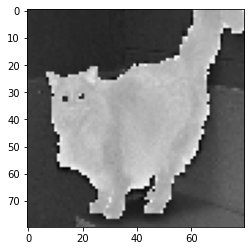

In [27]:
plt.imshow(x_data[777:778].reshape(80,80),cmap='gray')
plt.show()

In [16]:
# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(x_data, t_data, test_size=0.3, stratify=t_data)

# Normalization
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [17]:
# Model
model = Sequential()

# CNN Model Feature Extracting
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu',
                padding='SAME',
                input_shape=(80,80,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                kernel_size=(3,3),
                activation='relu',
                padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu',
                padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))

# DNN: FC Layer
model.add(Flatten())
model.add(Dropout(rate=0.5))

# DNN: Hidden Layer
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) # Binary Classification

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [18]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(norm_train_x_data.reshape(-1, 80, 80, 1),
                    train_t_data.reshape(-1,1),
                    epochs=200,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/200
123/123 [==============================] - 28s 121ms/step - loss: 0.6835 - accuracy: 0.5438 - val_loss: 0.6509 - val_accuracy: 0.6202
Epoch 2/200
123/123 [==============================] - 14s 111ms/step - loss: 0.6490 - accuracy: 0.6080 - val_loss: 0.6269 - val_accuracy: 0.6383
Epoch 3/200
123/123 [==============================] - 13s 109ms/step - loss: 0.6227 - accuracy: 0.6504 - val_loss: 0.6064 - val_accuracy: 0.6570
Epoch 4/200
123/123 [==============================] - 14s 111ms/step - loss: 0.5909 - accuracy: 0.6807 - val_loss: 0.5857 - val_accuracy: 0.6830
Epoch 5/200
123/123 [==============================] - 14s 113ms/step - loss: 0.5738 - accuracy: 0.6997 - val_loss: 0.5740 - val_accuracy: 0.6956
Epoch 6/200
123/123 [==============================] - 14s 111ms/step - loss: 0.5543 - accuracy: 0.7104 - val_loss: 0.5838 - val_accuracy: 0.6937
Epoch 7/200
123/123 [==============================] - 14s 112ms/step - loss: 0.5395 - accuracy: 0.7266 - val_loss: 0.5771 -

In [20]:
# Model 저장
model.save('/content/drive/MyDrive/Colab 멀캠 이지연/cat_dog/full_data_model/full_data_model.h5')

In [23]:
# 한 epoch당 13초 실화냐 -> 37분
# Evaluation
result = model.evaluate(norm_test_x_data.reshape(-1,80,80,1),
                        test_t_data.reshape(-1,1))
print(result) # loss: 0.8640 - accuracy: 0.7831

# new_model = load_model('/content/drive/MyDrive/Colab 멀캠 이지연/cat_dog/full_data_model/full_data_model.h5')
# new_model.evaluate(norm_test_x_data.reshape(-1,80,80,1),
#                         test_t_data.reshape(-1,1))
# print(new_model) # loss: 0.8640 - accuracy: 0.7831

235/235 [==============================] - 4s 17ms/step - loss: 0.8640 - accuracy: 0.7831
[0.8640370965003967, 0.7830666899681091]
235/235 [==============================] - 4s 17ms/step - loss: 0.8640 - accuracy: 0.7831


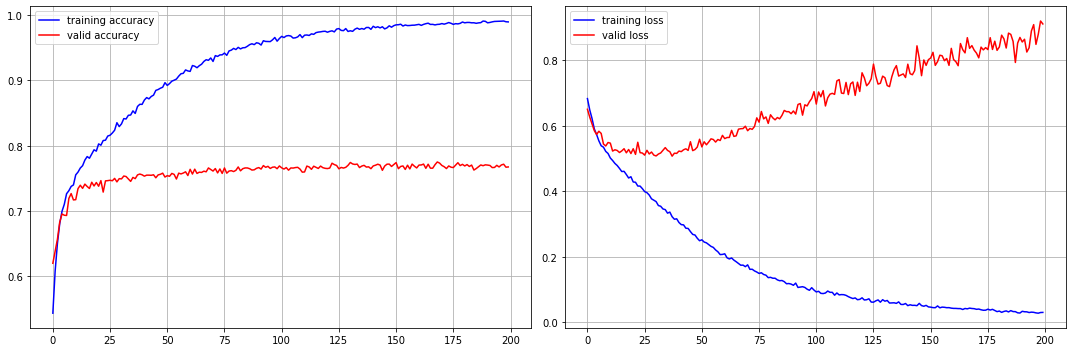

In [25]:
# history 객체로 그래프 그려보기
train_acc = history.history['accuracy']
train_loss = history.history['loss']

valid_acc = history.history['val_accuracy']
valid_loss = history.history['val_loss']

figure = plt.figure(figsize=(15,5))
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ax1.plot(train_acc, color='b', label='training accuracy')
ax1.plot(valid_acc, color='r', label='valid accuracy')
ax1.legend()
ax1.grid()

ax2.plot(train_loss, color='b', label='training loss')
ax2.plot(valid_loss, color='r', label='valid loss')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

In [30]:
# WanDB 연동

!pip install wandb -q

     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 181 kB 43.2 MB/s 
     |████████████████████████████████| 144 kB 48.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 


In [31]:
import wandb
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
project_name = 'cats_and_dogs'
group_name = 'cnn'
experiment_name = '2_conv'
wandb.init(
    project=project_name,
    group=group_name,
    name=experiment_name,
    config={
        "conv_1": 64,
        "activation_1": "relu",
        "kernel_size": (3, 3),
        "pool_size": (2, 2),
        "conv_2": 128,
        "activation_2": "relu",
        "activation_out": "softmax",
        "optimizer": "adam",
        "loss": "sparse_categorical_crossentropy",
        "metric": "accuracy",
        "epoch": 6,
        "batch_size": 32,
        "dropout": 0.5
    })
config = wandb.config